<a href="https://colab.research.google.com/github/Sohag016/CodeAlpha_HandwrittenCharacterRecognition/blob/main/Hand_Written_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow-datasets

In [ ]:
import os, json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report, confusion_matrix

print("TensorFlow:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
def plot_history(history, title="Training"):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history.get('val_accuracy', []), label='val_acc')
    plt.title(f"{title} — Accuracy"); plt.xlabel("Epoch"); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history.get('val_loss', []), label='val_loss')
    plt.title(f"{title} — Loss"); plt.xlabel("Epoch"); plt.legend()
    plt.show()

In [ ]:
def show_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("True")
    plt.colorbar(); plt.show()

In [ ]:
def show_samples(ds, preprocess_fn, n=6, title="Samples"):
    ds_sh = ds.map(preprocess_fn)
    plt.figure(figsize=(12,2))
    for i, (img, lbl) in enumerate(ds_sh.take(n)):
        plt.subplot(1,n,i+1)
        plt.imshow(tf.squeeze(img), cmap='gray'); plt.title(int(lbl.numpy()))
        plt.axis('off')
    plt.suptitle(title); plt.show()


<<<<<<<<=== MNIST quick model ===>>>>>>>>>>


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.6UHJAH_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.6UHJAH_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


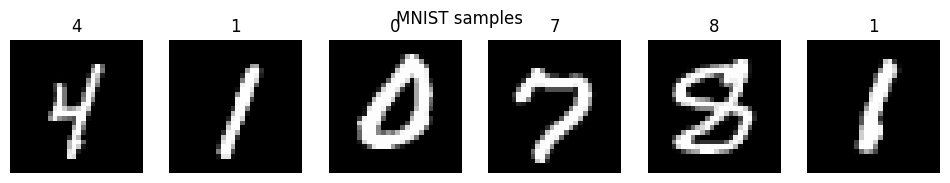

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,994 (6.20 MB)

 Trainable params: 1,625,930 (6.20 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
print("\n<<<<<<<<=== MNIST quick model ===>>>>>>>>>>")
(ds_mnist_train, ds_mnist_test), mnist_info = tfds.load('mnist', split=['train','test'], as_supervised=True, with_info=True)

IMG = 28
AUTOTUNE = tf.data.AUTOTUNE
MNIST_BATCH = 256

def preprocess_mnist(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [IMG,IMG,1])
    return image, label

mnist_train = ds_mnist_train.map(preprocess_mnist, num_parallel_calls=AUTOTUNE).shuffle(10000).batch(MNIST_BATCH).prefetch(AUTOTUNE)
mnist_test  = ds_mnist_test.map(preprocess_mnist, num_parallel_calls=AUTOTUNE).batch(MNIST_BATCH).prefetch(AUTOTUNE)

show_samples(ds_mnist_train, preprocess_mnist, n=6, title="MNIST samples")

def build_mnist_model():
    inp = tf.keras.Input((IMG,IMG,1))
    x = tf.keras.layers.Conv2D(32,3,padding='same',activation='relu')(inp)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(64,3,padding='same',activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128,activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    out = tf.keras.layers.Dense(10,activation='softmax')(x)
    return tf.keras.Model(inp,out)

mnist_model = build_mnist_model()
mnist_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
mnist_model.summary()

In [ ]:
mnist_ckpt = "mnist_best.keras"
mnist_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(mnist_ckpt, monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True, verbose=1)
]

Training MNIST (this should be fast on GPU)...
Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.97680, saving model to mnist_best.keras
235/235 - 22s - 92ms/step - accuracy: 0.8766 - loss: 0.4027 - val_accuracy: 0.9768 - val_loss: 1.0715 - learning_rate: 1.0000e-03
Epoch 2/30

Epoch 2: val_accuracy improved from 0.97680 to 0.98170, saving model to mnist_best.keras
235/235 - 4s - 16ms/step - accuracy: 0.9557 - loss: 0.1478 - val_accuracy: 0.9817 - val_loss: 0.1230 - learning_rate: 1.0000e-03
Epoch 3/30

Epoch 3: val_accuracy improved from 0.98170 to 0.98450, saving model to mnist_best.keras
235/235 - 6s - 24ms/step - accuracy: 0.9658 - loss: 0.1141 - val_accuracy: 0.9845 - val_loss: 0.0490 - learning_rate: 1.0000e-03
Epoch 4/30

Epoch 4: val_accuracy improved from 0.98450 to 0.98690, saving model to mnist_best.keras
235/235 - 5s - 20ms/step - accuracy: 0.9711 - loss: 0.0963 - val_accuracy: 0.9869 - val_loss: 0.0411 - learning_rate: 1.0000e-03
Epoch 5/30

Epoch 5: val_accuracy i

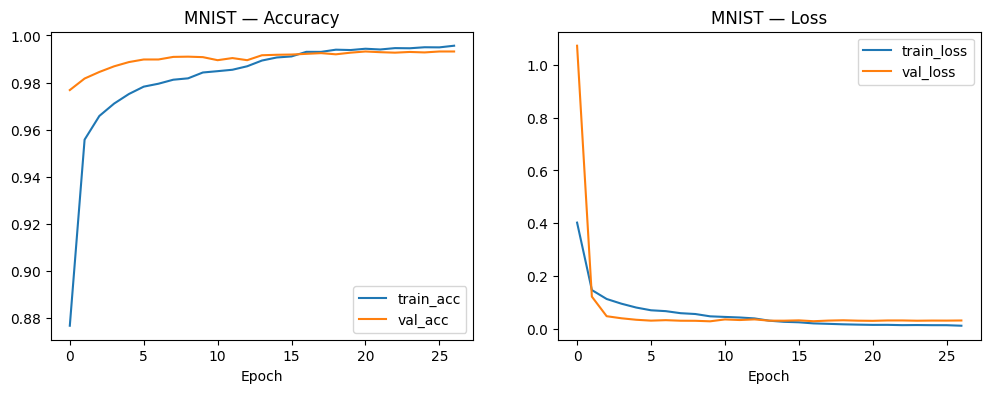

40/40 - 0s - 8ms/step - accuracy: 0.9932 - loss: 0.0315
MNIST test accuracy: 99.32%


In [ ]:
print("Training MNIST (this should be fast on GPU)...")
hist_mnist = mnist_model.fit(mnist_train, validation_data=mnist_test, epochs=30, callbacks=mnist_callbacks, verbose=2)
plot_history(hist_mnist, "MNIST")
mnist_eval = mnist_model.evaluate(mnist_test, verbose=2)
print(f"MNIST test accuracy: {mnist_eval[1]*100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
MNIST classification report:
              precision    recall  f1-score   support

           0     0.9919    0.9990    0.9954       980
           1     0.9974    0.9956    0.9965      1135
           2     0.9903    0.9922    0.9913      1032
           3     0.9921    0.9960    0.9941      1010
           4     0.9959    0.9939    0.9949       982
           5     0.9922    0.9933    0.9927       892
           6     0.9958    0.9916    0.9937       958
           7     0.9903    0.9912    0.9908      1028
           8     0.9938    0.9877    0.9907       974
           9     0.9921    0.9911    0.9916      1009

    accuracy                         0.9932     10000
   macro avg     0.9932    0.9932    0.9932     10000
weighted avg     0.9932    0.9932    0.9932     10000



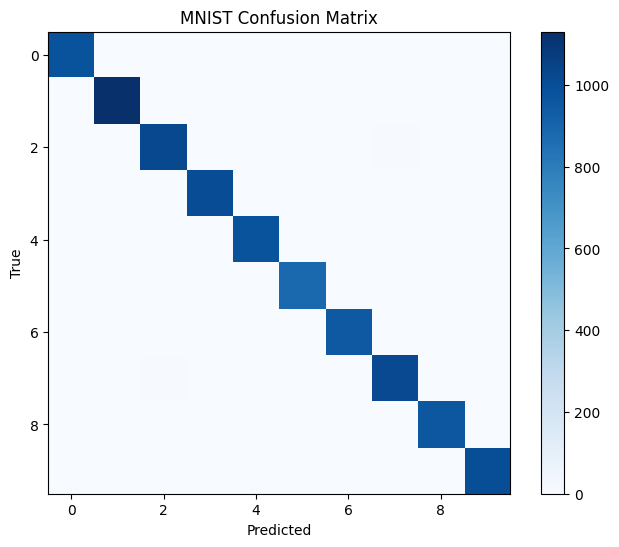

Saved mnist_model_final.keras


In [ ]:
y_true_m = np.concatenate([y.numpy() for _, y in mnist_test], axis=0)
y_pred_m = np.argmax(mnist_model.predict(mnist_test), axis=1)
print("MNIST classification report:")
print(classification_report(y_true_m, y_pred_m, digits=4))
show_confusion_matrix(y_true_m, y_pred_m, title="MNIST Confusion Matrix")
mnist_model.save("mnist_model_final.keras")
print("Saved mnist_model_final.keras")

In [ ]:
print("\n\n<<<<<<<<<<=== EMNIST advanced pipeline ===>>>>>>>>>>>>")
(ds_emnist_train, ds_emnist_test), emnist_info = tfds.load('emnist/balanced', split=['train','test'], as_supervised=True, with_info=True)
print("EMNIST classes:", emnist_info.features['label'].num_classes)

# preprocessing (transpose+flip + scale)
def preprocess_emnist(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.transpose(image, perm=[1,0,2])   # rotate 90
    image = tf.image.flip_left_right(image)     # flip to upright
    image = tf.reshape(image, [IMG,IMG,1])
    return image, label





<<<<<<<<<<=== EMNIST advanced pipeline ===>>>>>>>>>>>>


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.WJMQH6_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.WJMQH6_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.
EMNIST classes: 47


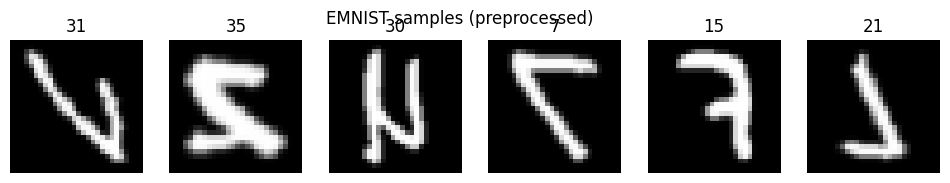

In [ ]:
# show samples
show_samples(ds_emnist_train, preprocess_emnist, n=6, title="EMNIST samples (preprocessed)")

In [ ]:
# dataset pipeline
EMNIST_BATCH = 256
emnist_train = ds_emnist_train.map(preprocess_emnist, num_parallel_calls=AUTOTUNE).shuffle(100000).batch(EMNIST_BATCH)
emnist_train = emnist_train.prefetch(AUTOTUNE)
emnist_test  = ds_emnist_test.map(preprocess_emnist, num_parallel_calls=AUTOTUNE).batch(EMNIST_BATCH).prefetch(AUTOTUNE)

In [ ]:
# MixUp helper (batch-level mix)
def mixup(batch_images, batch_labels, alpha=0.2):
    # batch_images: [B,H,W,C], batch_labels: [B,] (sparse)
    B = tf.shape(batch_images)[0]
    # convert labels to one-hot
    num_classes = tf.reduce_max(batch_labels) + 1
    labels_onehot = tf.one_hot(batch_labels, depth=num_classes)
    # sample lambda
    lam = tf.random.uniform([], 0.0, 1.0)
    lam = tf.maximum(lam, 1.0 - lam)
    # shuffle
    idx = tf.random.shuffle(tf.range(B))
    mixed_images = lam * batch_images + (1.0 - lam) * tf.gather(batch_images, idx)
    mixed_labels = lam * labels_onehot + (1.0 - lam) * tf.gather(labels_onehot, idx)
    return mixed_images, mixed_labels

In [ ]:
# We will apply mixup via a wrapper around dataset map after batching
def apply_mixup(ds, alpha=0.2):
    def _mix(batch):
        images, labels = batch
        images_m, labels_m = tf.py_function(func=lambda im, lb: mixup(im, lb, alpha),
                                            inp=[images, labels],
                                            Tout=[tf.float32, tf.float32])
        # set shapes (tf.py_function drops static shape)
        images_m.set_shape(images.shape)
        labels_m.set_shape([images.shape[0], None])
        return images_m, labels_m
    return ds.map(_mix, num_parallel_calls=AUTOTUNE)

In [ ]:
def mixup_tf(images, labels_onehot, alpha=0.2):
    B = tf.shape(images)[0]
    lam = tf.random.uniform([], 0.0, 1.0)
    lam = tf.maximum(lam, 1.0 - lam)
    idx = tf.random.shuffle(tf.range(B))
    mixed_images = lam * images + (1.0 - lam) * tf.gather(images, idx)
    mixed_labels = lam * labels_onehot + (1.0 - lam) * tf.gather(labels_onehot, idx)
    return mixed_images, mixed_labels

In [ ]:
# We'll prepare a train dataset that yields (images, onehot_labels), then apply mixup via map:
def prepare_emnist_for_mixup(ds, batch_size):
    def to_onehot(images, labels):
        num_classes = emnist_info.features['label'].num_classes
        labels_oh = tf.one_hot(labels, depth=num_classes)
        return images, labels_oh
    ds = ds.map(to_onehot, num_parallel_calls=AUTOTUNE)
    ds = ds.map(lambda x,y: (x, tf.cast(y, tf.float32)), num_parallel_calls=AUTOTUNE)
    return ds

emnist_train_for_mix = prepare_emnist_for_mixup(emnist_train, EMNIST_BATCH)
# apply mixup in-line using map (tf ops)
def mixup_map(images, labels, alpha=0.2):
    return mixup_tf(images, labels, alpha)

emnist_train_mixed = emnist_train_for_mix.map(lambda x,y: mixup_map(x,y,0.2), num_parallel_calls=AUTOTUNE)

In [ ]:
# emnist_train_mixed yields (mixed_images, mixed_labels_onehot)

# Advanced EMNIST model (deep + regularization)
from tensorflow.keras import regularizers

def build_emnist_model(num_classes):
    inp = tf.keras.Input((IMG,IMG,1))
    # augmentation (inside model)
    aug = tf.keras.Sequential([
        tf.keras.layers.RandomRotation(0.12),
        tf.keras.layers.RandomTranslation(0.12,0.12),
        tf.keras.layers.RandomZoom(0.12),
        tf.keras.layers.RandomContrast(0.12),
    ])
    x = aug(inp)
    for filters in [64,128,256,512]:
        x = tf.keras.layers.Conv2D(filters,3,padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)
        x = tf.keras.layers.Conv2D(filters,3,padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)
        x = tf.keras.layers.MaxPooling2D((2,2))(x)
        x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    out = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inp,out)
    return model

emnist_num_classes = emnist_info.features['label'].num_classes
emnist_model = build_emnist_model(emnist_num_classes)



In [ ]:
# Use AdamW (if TF version supports) otherwise fallback to Adam with weight decay via kernel_regularizer
if hasattr(tf.keras.optimizers, 'AdamW'):
    optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile with label smoothing (categorical crossentropy since mixup uses soft labels)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05)
emnist_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
emnist_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,978,671 (18.99 MB)

 Trainable params: 4,974,831 (18.98 MB)

 Non-trainable params: 3,840 (15.00 KB)


Training EMNIST advanced model (may take long). Using mixup + augmentation.
Epoch 1/80

Epoch 1: val_accuracy improved from -inf to 0.60362, saving model to emnist_best.keras
441/441 - 73s - 165ms/step - accuracy: 0.3272 - loss: 3.2375 - val_accuracy: 0.6036 - val_loss: 2.0280 - learning_rate: 1.0000e-03
Epoch 2/80

Epoch 2: val_accuracy improved from 0.60362 to 0.82069, saving model to emnist_best.keras
441/441 - 50s - 113ms/step - accuracy: 0.6464 - loss: 2.4511 - val_accuracy: 0.8207 - val_loss: 1.2163 - learning_rate: 1.0000e-03
Epoch 3/80

Epoch 3: val_accuracy improved from 0.82069 to 0.84346, saving model to emnist_best.keras
441/441 - 50s - 113ms/step - accuracy: 0.6881 - loss: 2.3003 - val_accuracy: 0.8435 - val_loss: 1.1198 - learning_rate: 1.0000e-03
Epoch 4/80

Epoch 4: val_accuracy did not improve from 0.84346
441/441 - 49s - 111ms/step - accuracy: 0.6794 - loss: 2.2560 - val_accuracy: 0.8170 - val_loss: 1.1766 - learning_rate: 1.0000e-03
Epoch 5/80

Epoch 5: val_accuracy

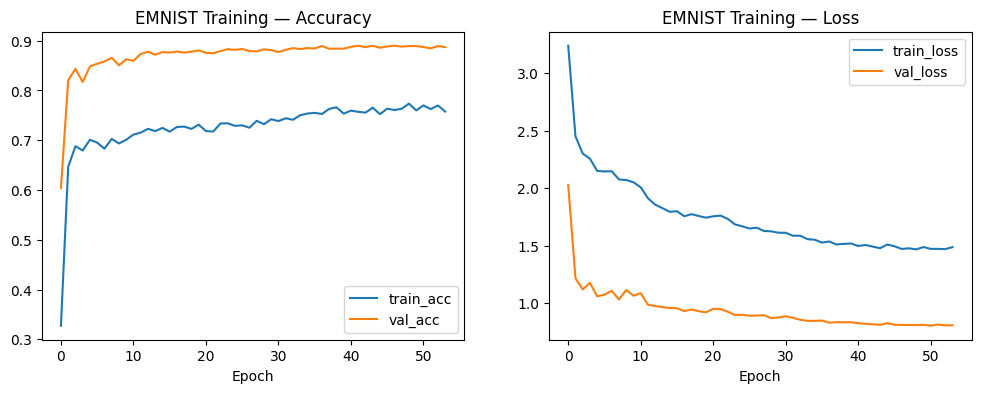

In [ ]:
# Callbacks
emnist_ckpt = "emnist_best.keras"
emnist_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(emnist_ckpt, monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, verbose=1)
]

# Training: Use mixed dataset for training, but validation uses normal (one-hot not required)
# Build validation dataset with one-hot labels to match loss type
def to_onehot_ds(ds):
    def _onehot(img, lbl):
        lbl_oh = tf.one_hot(lbl, depth=emnist_num_classes)
        return img, tf.cast(lbl_oh, tf.float32)
    return ds.map(_onehot, num_parallel_calls=AUTOTUNE)

emnist_val_ds = to_onehot_ds(emnist_test)

print("\nTraining EMNIST advanced model (may take long). Using mixup + augmentation.")
hist_emnist = emnist_model.fit(emnist_train_mixed,
                               validation_data=emnist_val_ds,
                               epochs=80,
                               callbacks=emnist_callbacks,
                               verbose=2)

plot_history(hist_emnist, title="EMNIST Training")


In [ ]:
# Evaluate EMNIST:
# For evaluation we need model.predict on emnist_test, but model was trained with soft labels.
# Convert predictions and true labels appropriately.
y_true_e = np.concatenate([y.numpy() for _, y in emnist_test], axis=0)
# Predict probabilities on emnist_test images
probs = emnist_model.predict(emnist_test, verbose=1)
y_pred_e = np.argmax(probs, axis=1)

print(f"\nEMNIST test accuracy (final): {np.mean(y_true_e == y_pred_e)*100:.2f}%")


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step

EMNIST test accuracy (final): 89.00%



EMNIST Classification report:
              precision    recall  f1-score   support

           0     0.6461    0.8125    0.7198       400
           1     0.4521    0.9075    0.6035       400
           2     0.9351    0.8650    0.8987       400
           3     0.9900    0.9900    0.9900       400
           4     0.9410    0.9575    0.9492       400
           5     0.9536    0.9250    0.9391       400
           6     0.9410    0.9575    0.9492       400
           7     0.9729    0.9875    0.9801       400
           8     0.9557    0.9700    0.9628       400
           9     0.6223    0.9225    0.7432       400
          10     0.9753    0.9875    0.9814       400
          11     0.9635    0.9900    0.9766       400
          12     0.9747    0.9650    0.9698       400
          13     0.9014    0.9600    0.9298       400
          14     0.9802    0.9925    0.9863       400
          15     0.7778    0.4725    0.5879       400
          16     0.9030    0.9775    0.9388       

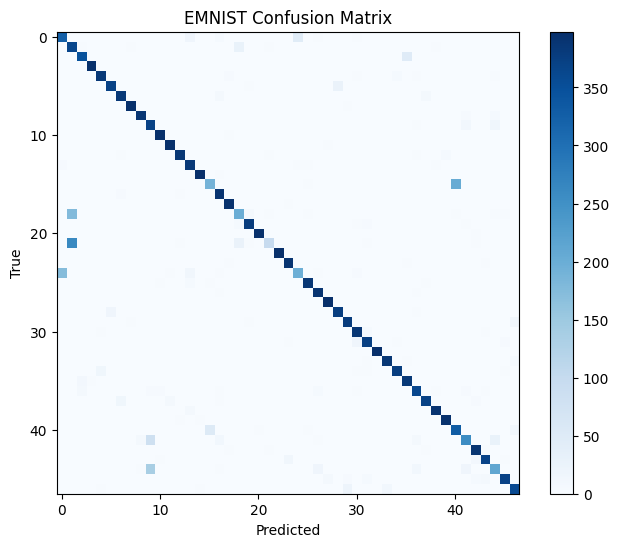

Saved emnist_model_final.keras and emnist_label_names.json


In [ ]:
print("\nEMNIST Classification report:")
print(classification_report(y_true_e, y_pred_e, digits=4))
show_confusion_matrix(y_true_e, y_pred_e, title="EMNIST Confusion Matrix")

# Save EMNIST model & labels
emnist_model.save("emnist_model_final.keras")
with open("emnist_label_names.json","w") as f:
    json.dump(emnist_info.features['label'].names, f, indent=2)
print("Saved emnist_model_final.keras and emnist_label_names.json")

In [ ]:

mn_acc = mnist_eval[1]*100
em_acc = np.mean(y_true_e == y_pred_e)*100
print(f"MNIST accuracy: {mn_acc:.2f}%")
print(f"EMNIST accuracy: {em_acc:.2f}%")

MNIST accuracy: 99.32%
EMNIST accuracy: 89.00%
